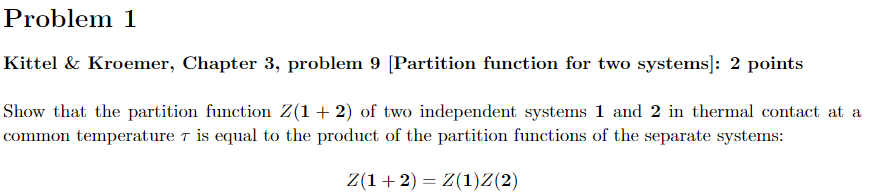

Partition function formula:

$$
Z = \sum_s e^{-\epsilon_s/\tau} \\
$$
Let's multiply two of these together
$$
Z_1 = \sum_{s_1} e^{-\epsilon_{s_1}/\tau} \\
Z_2 = \sum_{s_2} e^{-\epsilon_{s_2}/\tau} \\
Z_1 Z_2 = \sum_{s_1} \sum_{s_2} e^{-\epsilon_{s_1}/\tau} e^{-\epsilon_{s_2}/\tau} \\
= \sum_{s_1} \sum_{s_2} e^{(-\epsilon_{s_1}-\epsilon_{s_2})/\tau}
$$
Somehow we have to deal with these summations. 

The states availiable to system 1 and 2 combined are $g_{1,2} = g_1g_2$, so they make sense logically. 

States in the combined system $\bold 1+ \bold 2$ can be represented as $(s_1,s_2)$. The energy $\epsilon$ depends on $U(s)$, and $\epsilon_{s_1,s_2} = U_{tot}(s_1,s_2) = U_1(s_1)+U_2(s_2) = \epsilon_{s_1} + \epsilon_{s_2}$. 

As such, $Z(\bold 1 + \bold 2) = \sum_{(s_1,s_2)} e^{-\epsilon_{(s_1,s_2)}/\tau}$. All states possible can be indexed by two summations, so 

$$
\sum_{(s_1,s_2)} e^{-\epsilon_{(s_1,s_2)}/\tau} = \sum_{s_1} \sum_{s_2} e^{(-\epsilon_{s_1}-\epsilon_{s_2})/\tau} \\
Z_{1,2} = Z_1Z_2

$$

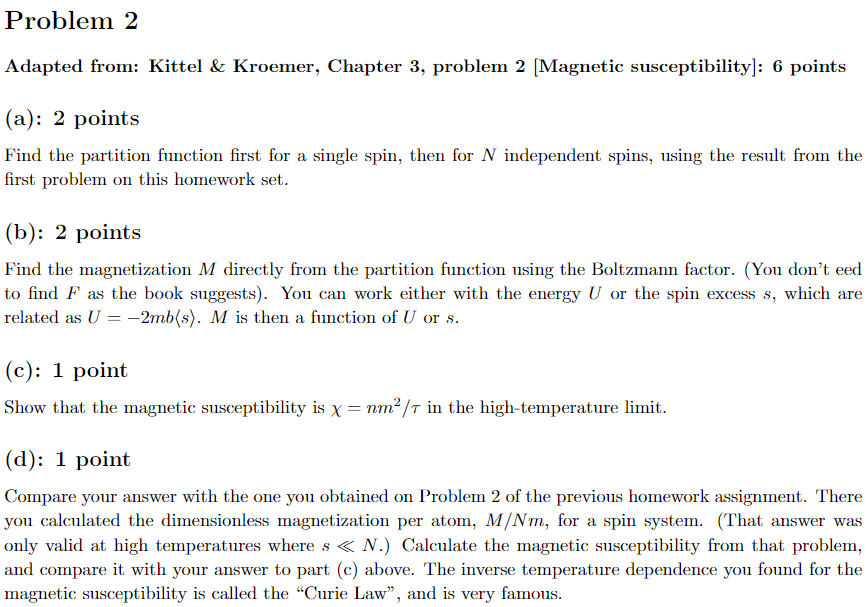

(a) <br>
For one particle:

$$
s = \{\uparrow, \downarrow \} \\
Z(s) = e^{-\epsilon_{\uparrow}/\tau} + e^{-\epsilon_{\downarrow}/\tau} \\
\epsilon_{s} = U(s) = \pm mb \\
Z(s) = e^{-mb/\tau} + e^{mb/\tau} = 2\cosh(mb/\tau)
$$

N particles:

$$
Z(s^N) = Z^N(s) = \left(e^{-mb/\tau} + e^{mb/\tau}\right)^N \\
= 2^N \cosh^N(mb/\tau) \\
%\cosh(mb/\tau) = \left(\frac{Z}{2^N}\right)^{1/N} = Z^{1/N}/2
$$

(b) <br>
If all spins are aligned we have $M = Nm/V$, but unalignd they are
$$
M = \langle 2s \rangle m/V = 2\langle s \rangle m/V
$$
Let's find $\langle s \rangle$ using $Z$

$$

\mathcal U = \tau^2 \frac{\partial \ln Z}{\partial \tau}  = - Nm b \tanh(mb/\tau) \\
\mathcal U = -2mb \langle s \rangle  \\
\langle s \rangle = \frac{- Nm b \tanh(mb/\tau) }{-2mb} = \frac{N \tanh(mb/\tau)}{2}\\
M = 2\langle s \rangle m/V  = (Nm/V) \tanh(mb/\tau) = nm\tanh(mb/\tau)
$$



In [25]:
import sympy as sym
from sympy import cosh, ln, tanh

n, N, m, b, tau = sym.symbols('n N m b tau')

Z = 2**N * (cosh(m*b/tau))**N
sym.diff(ln(Z), tau) * tau**2

-N*b*m*sinh(b*m/tau)/cosh(b*m/tau)

Yippie!

(c) <br>
$$
\chi = \frac{\partial M}{\partial b} = \frac{\partial}{\partial b} nm \tanh(mb/\tau) \\
= nm^2 /\tau \left(1 - \tanh^2(mb/\tau)\right)
$$
Since $\lim_{x\rightarrow 0} \tanh = 0$, this gives us

$$
\lim_{\tau\rightarrow \infty} \chi = nm^2 /\tau \left(1 - 0^2\right) = nm^2/\tau
$$


In [28]:
M = n*m*tanh(m*b/tau)
sym.diff(M, b)

m**2*n*(1 - tanh(b*m/tau)**2)/tau

(d) The end result didn't have a volume/density dependency

$$
\tau = \frac{-m^2b^2N}{-Mb} \\
M = \frac{bNm^2 }{\tau} \\
\chi = \frac{Nm^2}{\tau}
$$



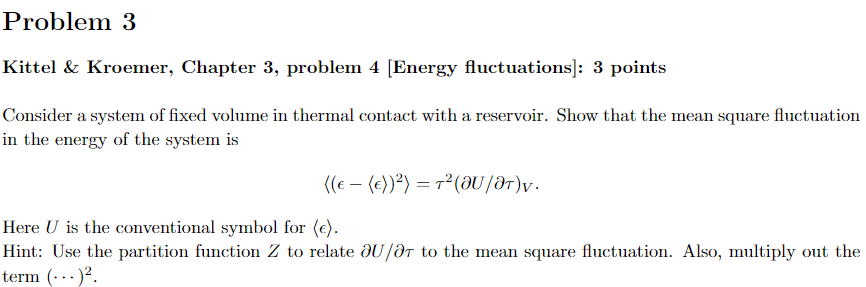
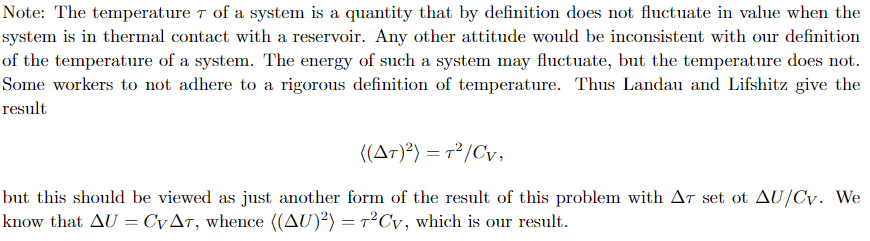

Fortunately we worked through the LHS in class

First off we'll expand the variance.
$$
\langle ( \epsilon - \langle \epsilon \rangle)^2 \rangle = \langle \epsilon^2 \rangle - \langle \epsilon \rangle ^2
$$

We have formulas for each of these
$$
\langle \epsilon \rangle = \mathcal U = -\frac{\partial \ln Z}{\partial \beta} \\
\langle \epsilon^2 \rangle = \frac{1}{Z}\frac{\partial^2 Z}{\partial \beta^2}
$$
(I use $\mathcal{U}$ since we're in canonical ensemble) <br>
This gives us the left side in terms of $Z$

$$
\langle \epsilon^2 \rangle - \langle \epsilon \rangle ^2 =
\frac{1}{Z}\frac{\partial^2 Z}{\partial \beta^2} - \left(\frac{\partial \ln Z}{\partial \beta}\right)^2  = \frac{\partial^2 \ln Z}{\partial \beta^2}
$$
That last step comes down to chain rule I believe. 

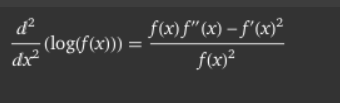


Let's convert from $\mathcal U$ to $Z$ on the right side. We'll need to go from $\tau$ to $\beta$

$$
\frac{\partial}{\partial \tau} = \frac{\partial \beta}{\partial \tau} \frac{\partial}{\partial \beta} = - \frac{1}{\tau^2} \frac{\partial}{\partial \beta}
$$
This gives us
$$
\tau^2 \frac{\partial U}{\partial \tau}
= \tau^2 \frac{\partial}{\partial \tau} \left(-\frac{\partial }{\partial \beta}\ln Z\right) \\
= \frac{\partial^2\ln Z}{\partial \beta^2} 
$$